# Ensembles

En esta notebook, veremos de hacer un ensemble neuronal de las técnicas vistas hasta el momento (y quizás alguna más)

Vamos a usar

- Modelo char
- Modelo BoW
- Modelo ElMO


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import csv

df_dev = pd.read_table("../../../data/es/dev_es.tsv", index_col="id", quoting=csv.QUOTE_NONE)
df_train = pd.read_table("../../../data/es/train_es.tsv", index_col="id", quoting=csv.QUOTE_NONE)
df_test = pd.read_table("../../../data/es/test_es.tsv", index_col="id", quoting=csv.QUOTE_NONE)

print("Instancias de entrenamiento: {}".format(len(df_train)))
print("Instancias de desarrollo: {}".format(len(df_dev)))
print("Instancias de test: {}".format(len(df_test)))


Instancias de entrenamiento: 4500
Instancias de desarrollo: 500
Instancias de test: 1600


Hagamos tokenize sobre el texto

## Modelo múltiple inputs
Hagamos un primer modelo con múltiple inputs.

In [2]:
%%capture
from elmoformanylangs import Embedder

e = Embedder("../../../models/elmo/es/")

In [5]:
from keras.models import Model
from keras.layers import Concatenate, Dense, CuDNNLSTM
from keras.optimizers import Adam
from keras.utils import plot_model
from hate.nn import CharModel, ElmoModel, BowModel, MergeModel

dropout = [0., 0.]

char_model = CharModel(max_charlen=140, vocab_size=200, recursive_class=CuDNNLSTM, dropout=dropout)
elmo_model = ElmoModel(50, embedder=e, recursive_class=CuDNNLSTM, dropout=dropout)
bow_model = BowModel(
    num_words=5500, vectorize_args={"max_df":0.65, "min_df": 0.00075}, dropout=dropout
)

merge_model = MergeModel([char_model, elmo_model, bow_model])


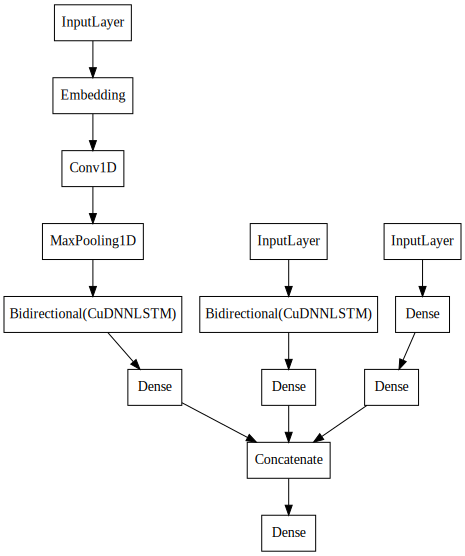

In [6]:
from IPython.display import Image, SVG


plot_model(merge_model, to_file='merge_model.svg', show_layer_names=False)
SVG('merge_model.svg')

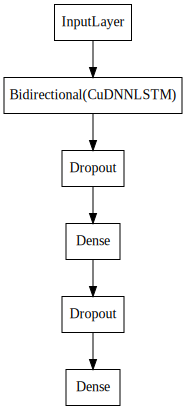

In [26]:
from IPython.display import Image, SVG


plot_model(elmo_model, to_file='elmo_model.pdf', show_layer_names=False)
SVG('elmo_model.svg')

In [14]:
X_train, y_train = df_train["text"], df_train["HS"]
X_dev, y_dev = df_dev["text"], df_dev["HS"]